# **İçerik**
1. [Veri setinin yüklenmesi ve değişkenlerin incelenmesi](#1)
1. [Değişkenlerin Açıklamaları](#2)
1. [Yüksek Ve Düşük Trafikli Aktarımda Ortalama Veri Kaybı](#3)
1. [Aktarım Sonrasında Video Kalitesinin Ölçümü (PSNR VE SSIM Değerleri)](#4)
1. [NFStream ile Elde Edilen Verilerin İncelenmesi](#5)
1. [Bizim Tarafımızdan Farklı Araçlar ile Elde Edilen Verilerin İncelenmesi](#6)
1. [Trafik Düzeyini Etkilemeyen Değişkenlerin Veri Setinden Çıkarılması](#7)
1. [Sonuç Değişkeni ile İlişkili Sütunların Korelasyon Matriksinin Oluşturulması](#8)
1. [Özellik Çıkarımı Yapılmış Yeni Veri Setinin Kayıt Edilmesi](#9)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
import warnings
warnings.filterwarnings("ignore")

<a id="1"></a>
# Veri setinin yüklenmesi ve değişkenlerin incelenmesi

In [2]:
df = pd.read_csv("video_stream_data_on_mininet.csv")

In [3]:
df.head()

,average_rtt,packet_loss,bits_per_second,bu_ratio,retransmits,cpu_host_total,cpu_host_user,cpu_host_system,cpu_remote_total,cpu_remote_user,...,dst2src_mean_piat_ms,dst2src_stddev_piat_ms,dst2src_max_piat_ms,psnr,ssim_first_value,ssim_second_value,original_file_size,file_size,traffic_type,hop_count
0,1561.634,12.4,8.610895e+05,91.389105,143,3.749818,0.487642,3.262176,0.018231,0.000000,...,1857.875000,2427.591483,7149,22.264886,0.919986,10.968353,39478308,36438016,3,3
1,1579.960,11.2,1.042366e+06,89.576335,148,3.349446,0.547793,2.801653,0.021710,0.009498,...,1838.000000,2470.896945,7226,21.776802,0.912782,10.593927,39478308,35651584,3,3
2,1682.569,12.0,7.902393e+05,92.097607,122,3.632624,0.515614,3.117006,0.016288,0.016288,...,1803.875000,2364.037795,6973,22.107516,0.916903,10.804169,39478308,35651584,3,3
3,1571.672,11.4,6.201423e+05,93.798577,84,3.876580,0.495170,3.381408,0.026087,0.000000,...,1957.000000,2537.372770,7358,21.658398,0.921705,11.062649,39478308,36700160,3,3
4,1546.242,12.6,6.521823e+05,93.478177,90,3.774115,0.505860,3.268269,0.032115,0.008590,...,1874.444444,1490.928160,4733,22.558550,0.926853,11.358054,39478308,36438016,3,3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 876 entries, 0 to 875
Data columns (total 51 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   average_rtt                   876 non-null    float64
 1   packet_loss                   876 non-null    float64
 2   bits_per_second               876 non-null    float64
 3   bu_ratio                      876 non-null    float64
 4   retransmits                   876 non-null    int64  
 5   cpu_host_total                876 non-null    float64
 6   cpu_host_user                 876 non-null    float64
 7   cpu_host_system               876 non-null    float64
 8   cpu_remote_total              876 non-null    float64
 9   cpu_remote_user               876 non-null    float64
 10  cpu_remote_system             876 non-null    float64
 11  bidirectional_duration_ms     876 non-null    int64  
 12  bidirectional_packets         876 non-null    int64  
 13  bidir

In [5]:
df.describe()

,average_rtt,packet_loss,bits_per_second,bu_ratio,retransmits,cpu_host_total,cpu_host_user,cpu_host_system,cpu_remote_total,cpu_remote_user,...,dst2src_mean_piat_ms,dst2src_stddev_piat_ms,dst2src_max_piat_ms,psnr,ssim_first_value,ssim_second_value,original_file_size,file_size,traffic_type,hop_count
count,876.000000,876.000000,8.760000e+02,876.000000,876.000000,876.000000,876.000000,876.000000,876.000000,876.000000,...,876.000000,876.000000,876.000000,876.000000,876.000000,876.000000,876.0,8.760000e+02,876.000000,876.000000
mean,981.176524,6.721461,3.792044e+06,62.079564,365.222603,2.777621,0.547207,2.230412,0.064690,0.006082,...,976.856438,960.242888,2878.339041,29.493238,0.958020,18.416372,39478308.0,3.791123e+07,1.961187,4.049087
std,708.313951,7.264363,3.018954e+06,30.189545,282.820358,1.420786,0.158032,1.313744,0.107529,0.009322,...,788.654874,902.081451,2701.814898,7.654090,0.053465,7.269578,0.0,1.536094e+06,0.999817,0.790580
min,252.167000,0.000000,4.903700e+04,27.913547,2.000000,0.011761,0.000000,0.011761,0.005993,0.000000,...,0.000000,0.000000,0.000000,13.855173,0.659071,4.673356,39478308.0,3.434086e+07,1.000000,3.000000
25%,305.550250,0.000000,6.409843e+05,32.843865,92.000000,1.589483,0.466003,1.101423,0.010710,0.000000,...,268.428571,212.473164,608.000000,22.163544,0.924735,11.234054,39478308.0,3.643802e+07,1.000000,3.000000
50%,357.793000,0.000000,6.074250e+06,39.257501,216.500000,1.824537,0.532769,1.347247,0.030360,0.000000,...,315.500000,250.479445,721.500000,30.495852,0.990980,20.447921,39478308.0,3.932160e+07,1.000000,4.000000
75%,1676.036250,13.600000,6.715613e+06,93.590157,642.000000,3.851638,0.602716,3.279801,0.046064,0.009297,...,1832.177083,1522.127788,4703.250000,38.177993,0.997364,25.791166,39478308.0,3.932160e+07,3.000000,5.000000
max,2507.467000,28.200000,7.208645e+06,99.509630,954.000000,16.635780,2.839005,13.796777,0.657608,0.042281,...,4391.333333,4283.015593,12250.000000,39.024248,0.998307,27.712895,39478308.0,3.932160e+07,3.000000,5.000000


In [6]:
# 1 değerindeki trafik tipinin "low", 3 değerindeki trafik tipinin "high" ile değiştirilmesi
df.loc[df['traffic_type'] == 1, 'traffic_type'] = 'low'
df.loc[df['traffic_type'] == 3, 'traffic_type'] = 'high'

# Numeric olarak traffic_type_numeric sütununun eklenmesi
df['traffic_type_numeric'] = [1 if x == 'low' else 2 for x in df['traffic_type']]

In [7]:
df.head()

,average_rtt,packet_loss,bits_per_second,bu_ratio,retransmits,cpu_host_total,cpu_host_user,cpu_host_system,cpu_remote_total,cpu_remote_user,...,dst2src_stddev_piat_ms,dst2src_max_piat_ms,psnr,ssim_first_value,ssim_second_value,original_file_size,file_size,traffic_type,hop_count,traffic_type_numeric
0,1561.634,12.4,8.610895e+05,91.389105,143,3.749818,0.487642,3.262176,0.018231,0.000000,...,2427.591483,7149,22.264886,0.919986,10.968353,39478308,36438016,high,3,2
1,1579.960,11.2,1.042366e+06,89.576335,148,3.349446,0.547793,2.801653,0.021710,0.009498,...,2470.896945,7226,21.776802,0.912782,10.593927,39478308,35651584,high,3,2
2,1682.569,12.0,7.902393e+05,92.097607,122,3.632624,0.515614,3.117006,0.016288,0.016288,...,2364.037795,6973,22.107516,0.916903,10.804169,39478308,35651584,high,3,2
3,1571.672,11.4,6.201423e+05,93.798577,84,3.876580,0.495170,3.381408,0.026087,0.000000,...,2537.372770,7358,21.658398,0.921705,11.062649,39478308,36700160,high,3,2
4,1546.242,12.6,6.521823e+05,93.478177,90,3.774115,0.505860,3.268269,0.032115,0.008590,...,1490.928160,4733,22.558550,0.926853,11.358054,39478308,36438016,high,3,2


In [8]:
low_traffic = df[df["traffic_type"] == "low"]
high_traffic = df[df["traffic_type"] == "high"]

In [9]:
def bar_plot(veriable):
    """
    input: veriable ex:"sex"
    output: bar plot & value count
    """
    #get feature
    var = df[veriable]
    # count number of categorical variable
    varValue = var.value_counts()
    
    # visualize
    plt.figure(figsize=(9,3))
    plt.bar(varValue.index,varValue, color="orange")
    plt.xticks(varValue.index,varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(veriable)
    plt.show()
    
    print(f"{veriable}\n{varValue}")
    

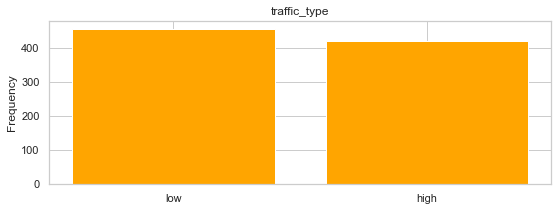

traffic_type
low     455
high    421
Name: traffic_type, dtype: int64


In [10]:
bar_plot("traffic_type")
# 1 -> Low traffic
# 3 -> High traffic

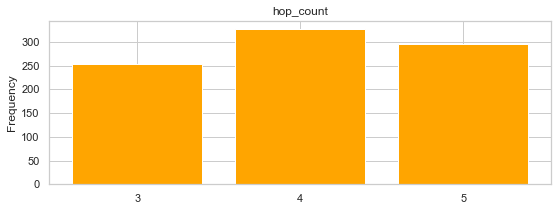

hop_count
4    327
5    296
3    253
Name: hop_count, dtype: int64


In [11]:
bar_plot("hop_count")

<a id="2"></a>
# Değişkenlerin Açıklamaları

Burayı Batuhan dolduracak

<a id="3"></a>
# Yüksek Ve Düşük Trafikli Aktarımda Ortalama Veri Kaybı

In [12]:
original_file_size = 39478308
average_low_traffic_file_size = df[df["traffic_type"] == "low"]["file_size"].mean()
average_high_traffic_file_size = df[df["traffic_type"] == "high"]["file_size"].mean()

In [13]:
print(f"Orjinal dosya boyutu: {original_file_size}")
print(f"Düşük trafikli ortamda veri aktarımı sonrasında ortalama dosya boyutu: {average_low_traffic_file_size}")
print(f"Yüksek trafikli ortamda veri aktarımı sonrasında ortalama dosya boyutu: {average_high_traffic_file_size}")

Orjinal dosya boyutu: 39478308
Düşük trafikli ortamda veri aktarımı sonrasında ortalama dosya boyutu: 39320447.71868132
Yüksek trafikli ortamda veri aktarımı sonrasında ortalama dosya boyutu: 36388202.41330166


In [14]:
# Düşük Trafik için dosya kaybı (bit)
print(f"Düşük trafikli ortamda aktarım sonrasında ortalama olarak {original_file_size - average_low_traffic_file_size} bit kayıp oluşmuştur.")

Düşük trafikli ortamda aktarım sonrasında ortalama olarak 157860.28131867945 bit kayıp oluşmuştur.


In [15]:
# Yüksek Trafik için dosya kaybı (bit)
print(f"Yüksek trafikli ortamda aktarım sonrasında ortalama olarak {original_file_size - average_high_traffic_file_size} bit kayıp oluşmuştur.")

Yüksek trafikli ortamda aktarım sonrasında ortalama olarak 3090105.5866983384 bit kayıp oluşmuştur.


In [16]:
# Eğitim sırasında kullanılmayacağı için dosya boyutu sütunlarının veriden çıkarılması işlemi
df = df.drop(["file_size", "original_file_size"], axis=1)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 876 entries, 0 to 875
Data columns (total 50 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   average_rtt                   876 non-null    float64
 1   packet_loss                   876 non-null    float64
 2   bits_per_second               876 non-null    float64
 3   bu_ratio                      876 non-null    float64
 4   retransmits                   876 non-null    int64  
 5   cpu_host_total                876 non-null    float64
 6   cpu_host_user                 876 non-null    float64
 7   cpu_host_system               876 non-null    float64
 8   cpu_remote_total              876 non-null    float64
 9   cpu_remote_user               876 non-null    float64
 10  cpu_remote_system             876 non-null    float64
 11  bidirectional_duration_ms     876 non-null    int64  
 12  bidirectional_packets         876 non-null    int64  
 13  bidir

<a id="4"></a>
# Aktarım Sonrasında Video Kalitesinin Ölçümü (PSNR VE SSIM Değerleri)

In [18]:
low_traffic_psnr = low_traffic["psnr"].mean()
low_traffic_ssim = low_traffic["ssim_second_value"].mean()
print(f"Düşük trafikte ortalama PSNR değeri: {low_traffic_psnr}")
print(f"Düşük trafikte ortalama SSIM değeri: {low_traffic_ssim}")

Düşük trafikte ortalama PSNR değeri: 36.45242443076924
Düşük trafikte ortalama SSIM değeri: 25.13796473846158


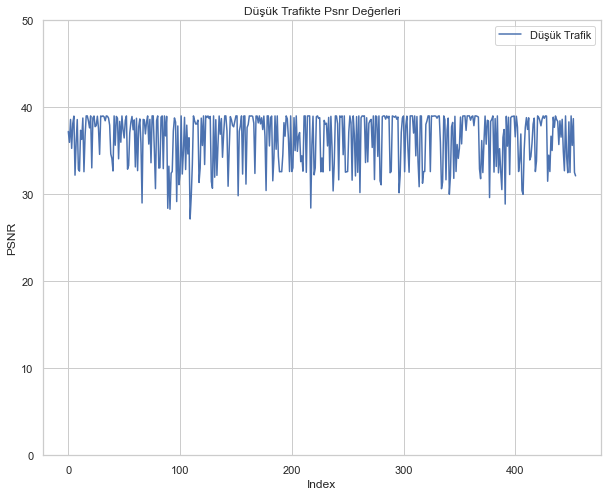

In [19]:
plt.figure(figsize=(10, 8))
plt.xlabel("Index")
plt.ylabel("PSNR")
plt.title(f"Düşük Trafikte Psnr Değerleri")
plt.ylim((0,50))
sns.lineplot(x=[i for i in range(len(low_traffic["psnr"]))], y=low_traffic["psnr"].values, label="Düşük Trafik")
plt.legend()
plt.show()

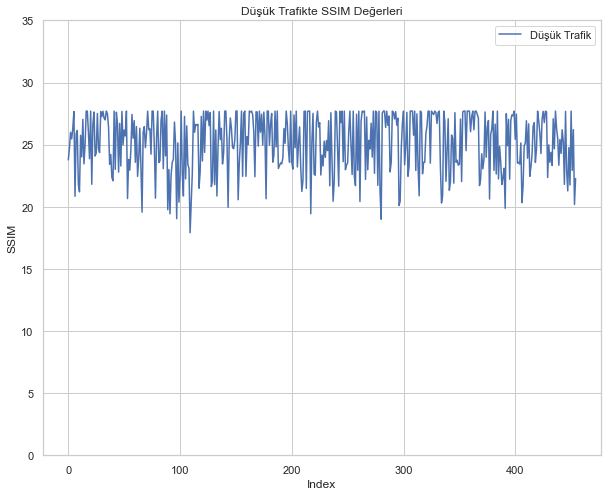

In [20]:
plt.figure(figsize=(10, 8))
plt.xlabel("Index")
plt.ylabel("SSIM")
plt.title(f"Düşük Trafikte SSIM Değerleri")
plt.ylim((0,35))
sns.lineplot(x=[i for i in range(len(low_traffic["ssim_second_value"]))], y=low_traffic["ssim_second_value"].values, label="Düşük Trafik")
plt.legend()
plt.show()

In [21]:
high_traffic_psnr = high_traffic["psnr"].mean()
high_traffic_ssim = high_traffic["ssim_second_value"].mean()
print(f"Yüksek trafikte ortalama PSNR değeri: {high_traffic_psnr}")
print(f"Yüksek trafikte ortalama SSIM değeri: {high_traffic_ssim}")

Yüksek trafikte ortalama PSNR değeri: 21.972026572446566
Yüksek trafikte ortalama SSIM değeri: 11.151941900237526


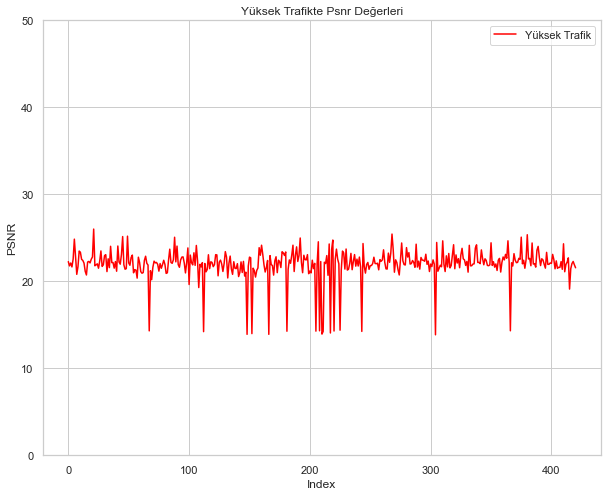

In [22]:
plt.figure(figsize=(10, 8))
plt.xlabel("Index")
plt.ylabel("PSNR")
plt.title(f"Yüksek Trafikte Psnr Değerleri")
plt.ylim((0,50))
sns.lineplot(x=[i for i in range(len(high_traffic["psnr"]))], y=high_traffic["psnr"].values, label="Yüksek Trafik", color="red")
plt.legend()
plt.show()

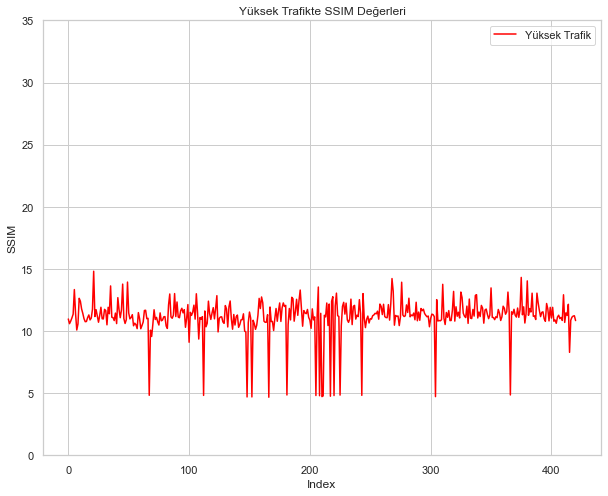

In [23]:
plt.figure(figsize=(10, 8))
plt.xlabel("Index")
plt.ylabel("SSIM")
plt.title(f"Yüksek Trafikte SSIM Değerleri")
plt.ylim((0,35))
sns.lineplot(x=[i for i in range(len(high_traffic["ssim_second_value"]))], y=high_traffic["ssim_second_value"].values, label="Yüksek Trafik", color="red")
plt.legend()
plt.show()

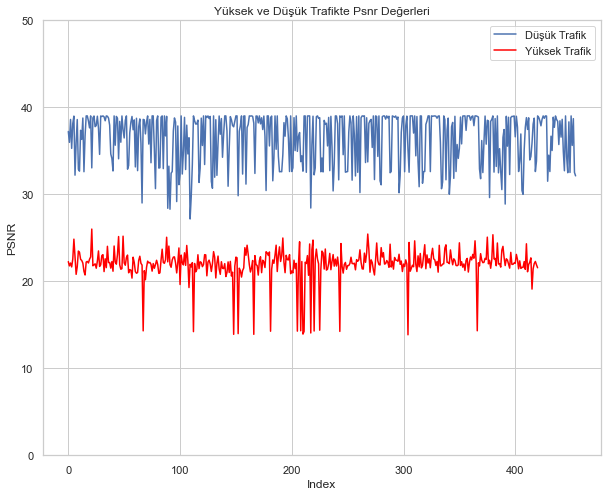

In [24]:
# PSNR Değerlerinin ortak grafikte gösterimi
plt.figure(figsize=(10, 8))
plt.xlabel("Index")
plt.ylabel("PSNR")
plt.title(f"Yüksek ve Düşük Trafikte Psnr Değerleri")
plt.ylim((0,50))
sns.lineplot(x=[i for i in range(len(low_traffic["psnr"]))], y=low_traffic["psnr"].values, label="Düşük Trafik")
sns.lineplot(x=[i for i in range(len(high_traffic["psnr"]))], y=high_traffic["psnr"].values, label="Yüksek Trafik", color="red")
plt.legend()
plt.show()

In [25]:
# Eğitim sırasında kullanılmayacağı için video kalite parametrelerinin veriden çıkarılması işlemi
df = df.drop(["psnr", "ssim_first_value", "ssim_second_value"], axis=1)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 876 entries, 0 to 875
Data columns (total 47 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   average_rtt                   876 non-null    float64
 1   packet_loss                   876 non-null    float64
 2   bits_per_second               876 non-null    float64
 3   bu_ratio                      876 non-null    float64
 4   retransmits                   876 non-null    int64  
 5   cpu_host_total                876 non-null    float64
 6   cpu_host_user                 876 non-null    float64
 7   cpu_host_system               876 non-null    float64
 8   cpu_remote_total              876 non-null    float64
 9   cpu_remote_user               876 non-null    float64
 10  cpu_remote_system             876 non-null    float64
 11  bidirectional_duration_ms     876 non-null    int64  
 12  bidirectional_packets         876 non-null    int64  
 13  bidir

<a id="5"></a>
# NFStream ile Elde Edilen Verilerin İncelenmesi

In [27]:
df.columns

Index(['average_rtt', 'packet_loss', 'bits_per_second', 'bu_ratio',
       'retransmits', 'cpu_host_total', 'cpu_host_user', 'cpu_host_system',
       'cpu_remote_total', 'cpu_remote_user', 'cpu_remote_system',
       'bidirectional_duration_ms', 'bidirectional_packets',
       'bidirectional_bytes', 'src2dst_duration_ms', 'src2dst_packets',
       'src2dst_bytes', 'dst2src_duration_ms', 'dst2src_packets',
       'dst2src_bytes', 'bidirectional_min_ps', 'bidirectional_mean_ps',
       'bidirectional_stddev_ps', 'bidirectional_max_ps', 'src2dst_min_ps',
       'src2dst_mean_ps', 'src2dst_stddev_ps', 'src2dst_max_ps',
       'dst2src_min_ps', 'dst2src_mean_ps', 'dst2src_stddev_ps',
       'dst2src_max_ps', 'bidirectional_min_piat_ms',
       'bidirectional_mean_piat_ms', 'bidirectional_stddev_piat_ms',
       'bidirectional_max_piat_ms', 'src2dst_min_piat_ms',
       'src2dst_mean_piat_ms', 'src2dst_stddev_piat_ms', 'src2dst_max_piat_ms',
       'dst2src_min_piat_ms', 'dst2src_mean_piat_

In [28]:
nfstream_columns = ['bidirectional_duration_ms', 'bidirectional_packets',
       'bidirectional_bytes', 'src2dst_duration_ms', 'src2dst_packets',
       'src2dst_bytes', 'dst2src_duration_ms', 'dst2src_packets',
       'dst2src_bytes', 'bidirectional_min_ps', 'bidirectional_mean_ps',
       'bidirectional_stddev_ps', 'bidirectional_max_ps', 'src2dst_min_ps',
       'src2dst_mean_ps', 'src2dst_stddev_ps', 'src2dst_max_ps',
       'dst2src_min_ps', 'dst2src_mean_ps', 'dst2src_stddev_ps',
       'dst2src_max_ps', 'bidirectional_min_piat_ms',
       'bidirectional_mean_piat_ms', 'bidirectional_stddev_piat_ms',
       'bidirectional_max_piat_ms', 'src2dst_min_piat_ms',
       'src2dst_mean_piat_ms', 'src2dst_stddev_piat_ms', 'src2dst_max_piat_ms',
       'dst2src_min_piat_ms', 'dst2src_mean_piat_ms', 'dst2src_stddev_piat_ms',
       'dst2src_max_piat_ms', 'traffic_type_numeric']

In [29]:
corr = df.loc[:,nfstream_columns].corr()
corr

,bidirectional_duration_ms,bidirectional_packets,bidirectional_bytes,src2dst_duration_ms,src2dst_packets,src2dst_bytes,dst2src_duration_ms,dst2src_packets,dst2src_bytes,bidirectional_min_ps,...,bidirectional_max_piat_ms,src2dst_min_piat_ms,src2dst_mean_piat_ms,src2dst_stddev_piat_ms,src2dst_max_piat_ms,dst2src_min_piat_ms,dst2src_mean_piat_ms,dst2src_stddev_piat_ms,dst2src_max_piat_ms,traffic_type_numeric
bidirectional_duration_ms,1.000000,0.226902,-0.053694,1.000000,0.268146,-0.058633,0.999127,0.178596,0.208585,-0.060667,...,0.968958,-0.078947,0.987666,0.965982,0.969796,-0.017356,0.980336,0.910518,0.920981,0.966646
bidirectional_packets,0.226902,1.000000,0.928871,0.226969,0.997008,0.926275,0.224324,0.996167,0.995995,-0.107517,...,0.209731,-0.119548,0.202013,0.197189,0.206159,-0.082123,0.197150,0.185400,0.191952,0.227106
bidirectional_bytes,-0.053694,0.928871,1.000000,-0.053705,0.917033,0.999974,-0.052832,0.935561,0.927432,-0.007741,...,-0.052920,-0.005978,-0.063970,-0.053244,-0.050106,-0.005682,-0.060870,-0.050676,-0.049009,-0.044623
src2dst_duration_ms,1.000000,0.226969,-0.053705,1.000000,0.268215,-0.058646,0.999120,0.178659,0.208635,-0.060659,...,0.968939,-0.079100,0.987636,0.965949,0.969776,-0.017549,0.980300,0.910505,0.920968,0.966628
src2dst_packets,0.268146,0.997008,0.917033,0.268215,1.000000,0.914392,0.265190,0.986424,0.987378,-0.103793,...,0.252728,-0.121511,0.239196,0.232978,0.241446,-0.082120,0.241103,0.237128,0.243471,0.267560
src2dst_bytes,-0.058633,0.926275,0.999974,-0.058646,0.914392,1.000000,-0.057725,0.933035,0.924734,-0.005690,...,-0.057487,-0.003767,-0.068744,-0.057732,-0.054695,-0.004442,-0.065353,-0.054517,-0.052955,-0.049440
dst2src_duration_ms,0.999127,0.224324,-0.052832,0.999120,0.265190,-0.057725,1.000000,0.176464,0.206952,-0.060139,...,0.970001,-0.078748,0.989370,0.972428,0.974776,-0.008731,0.983779,0.913295,0.923486,0.959721
dst2src_packets,0.178596,0.996167,0.935561,0.178659,0.986424,0.933035,0.176464,1.000000,0.998555,-0.110955,...,0.159564,-0.116464,0.158481,0.155270,0.164742,-0.081532,0.145992,0.125530,0.132271,0.179692
dst2src_bytes,0.208585,0.995995,0.927432,0.208635,0.987378,0.924734,0.206952,0.998555,1.000000,-0.114450,...,0.189806,-0.121215,0.190459,0.185398,0.193597,-0.070075,0.178044,0.153940,0.160961,0.210609
bidirectional_min_ps,-0.060667,-0.107517,-0.007741,-0.060659,-0.103793,-0.005690,-0.060139,-0.110955,-0.114450,1.000000,...,-0.058328,-0.003472,-0.065720,-0.056679,-0.055459,-0.003202,-0.062755,-0.053931,-0.053975,-0.001014


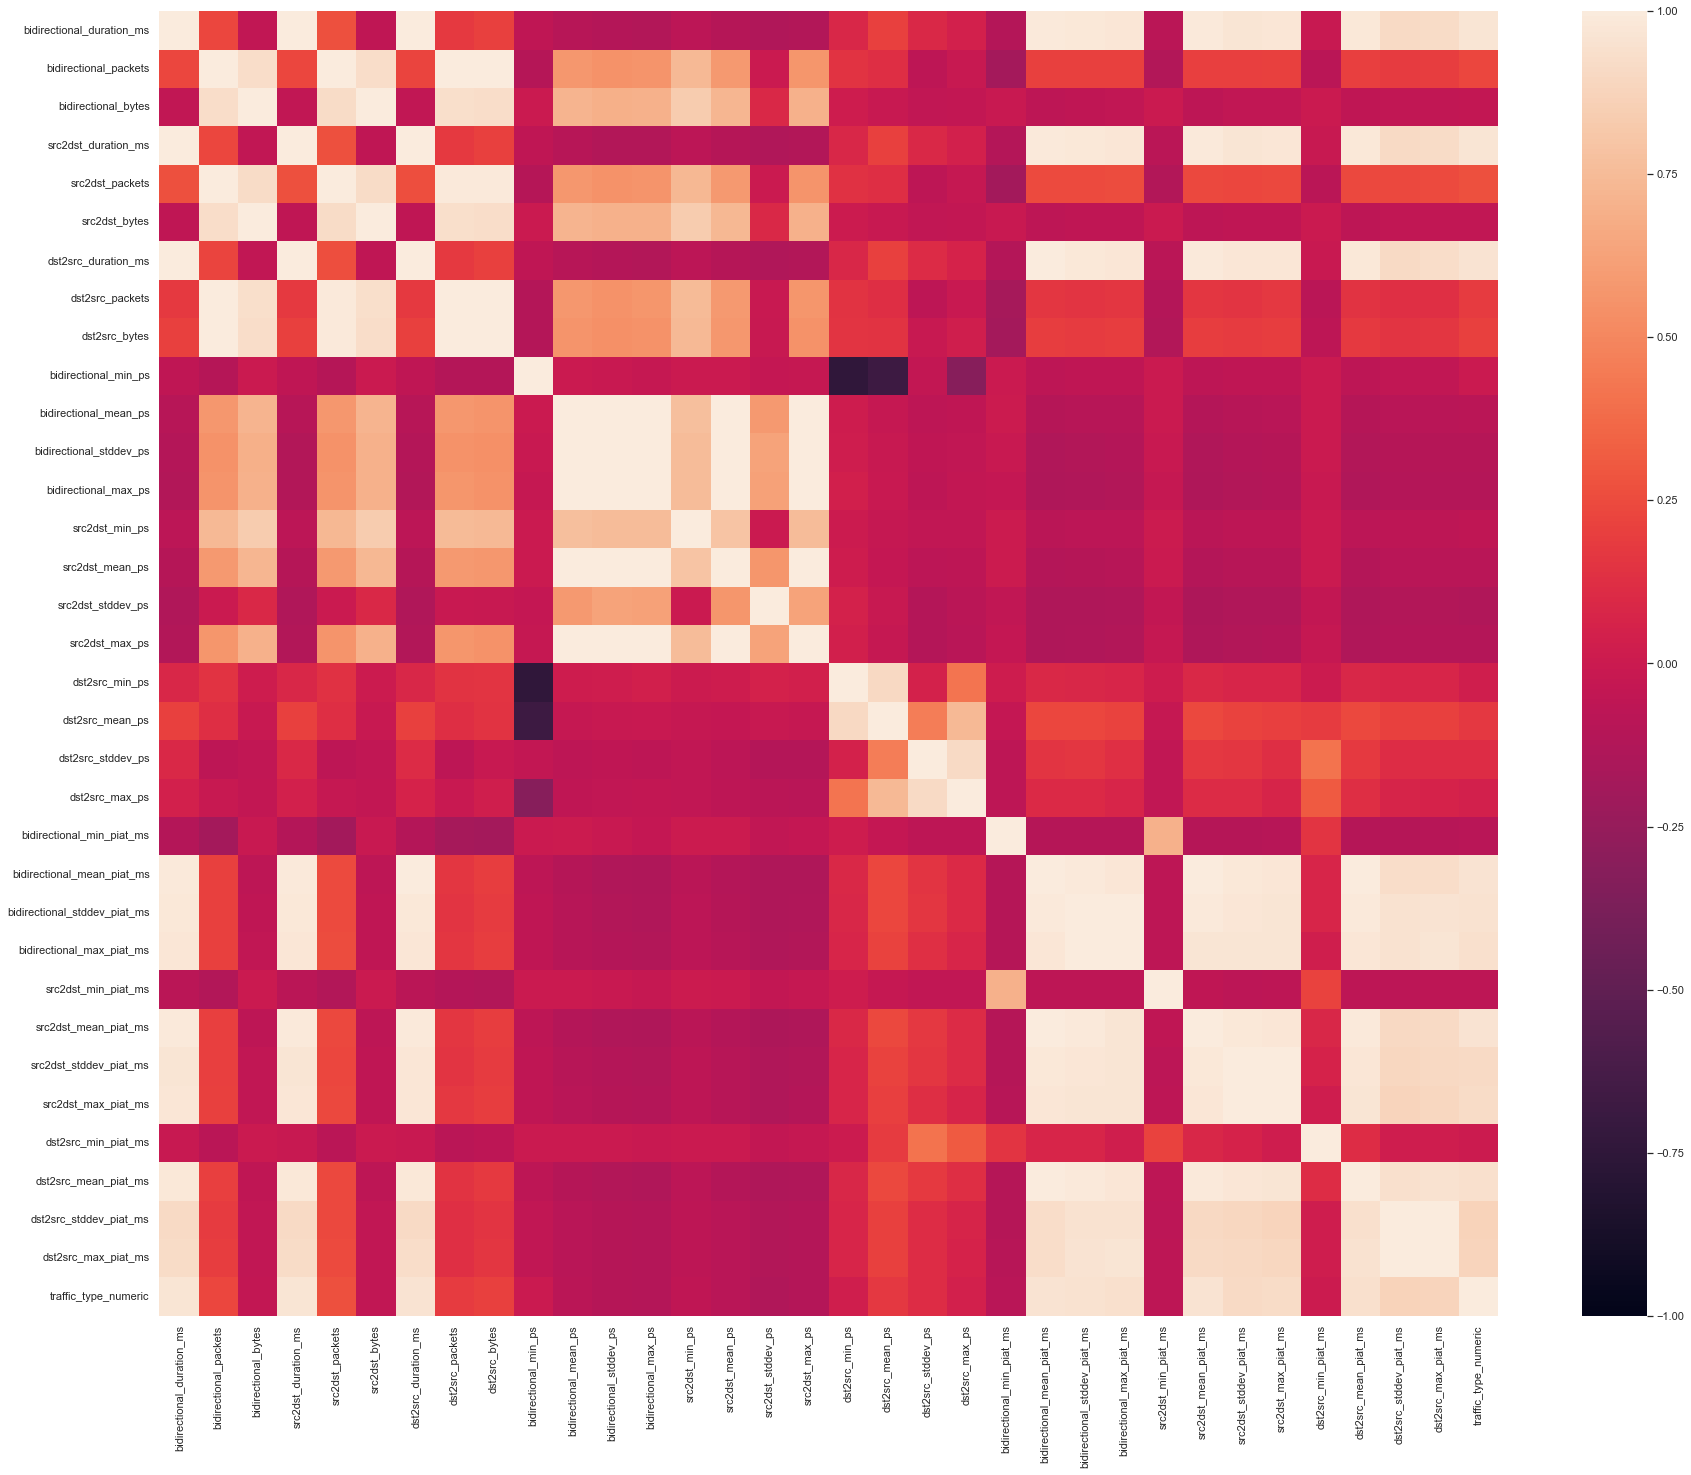

In [30]:
plt.figure(figsize=(30, 24))
ax1 = sns.heatmap(corr, vmin=-1, vmax=1)

In [31]:
def linePlot(veriable):
    low_traffic = df[df["traffic_type"] == "low"][veriable]
    high_traffic = df[df["traffic_type"] == "high"][veriable]

    plt.figure(figsize=(10, 8))
    plt.xlabel("Index")
    plt.ylabel(veriable)
    plt.title(f"{str.upper(veriable)} Sütunu Düşük ve Yüksek Trafikte Çizgi Grafiği")
    sns.lineplot(x=[i for i in range(len(low_traffic))], y=low_traffic.values, label="Düşük Trafik")
    sns.lineplot(x=[i for i in range(len(high_traffic))], y=high_traffic.values, label="Yüksek Trafik")    
    plt.legend()
    plt.show()

In [32]:
nfstream_columns.remove("traffic_type_numeric")

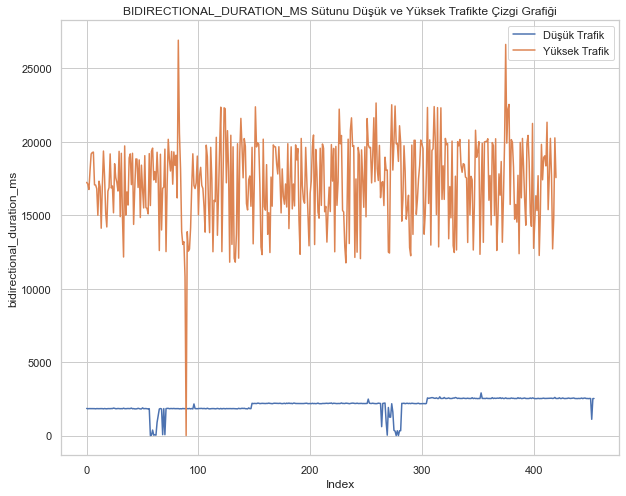

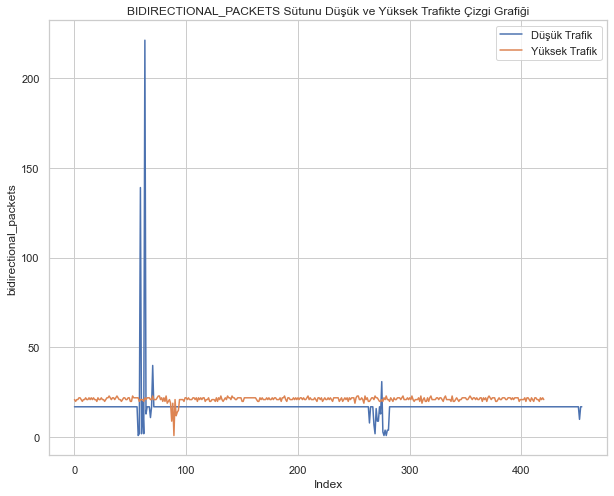

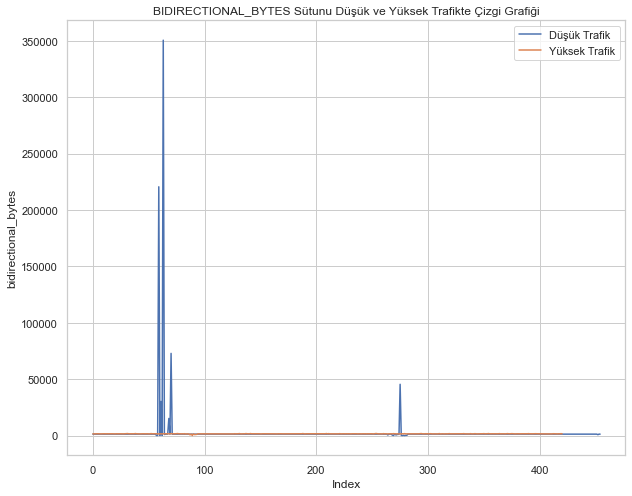

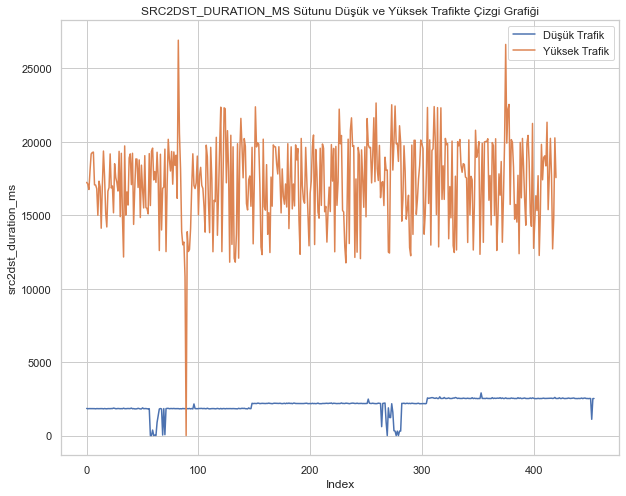

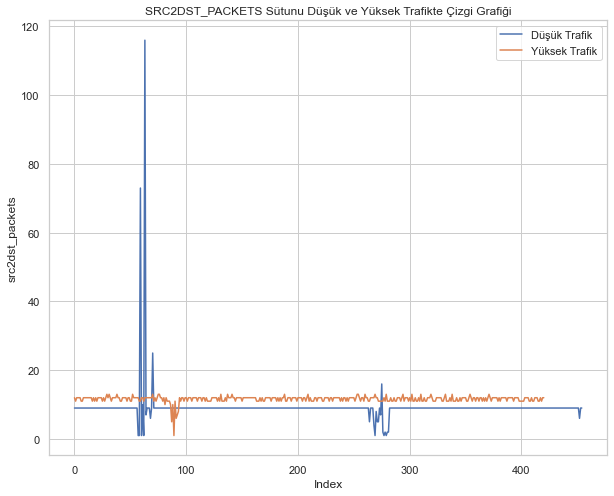

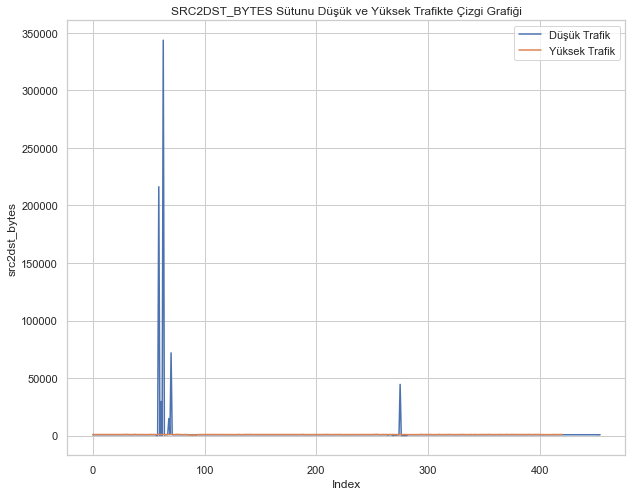

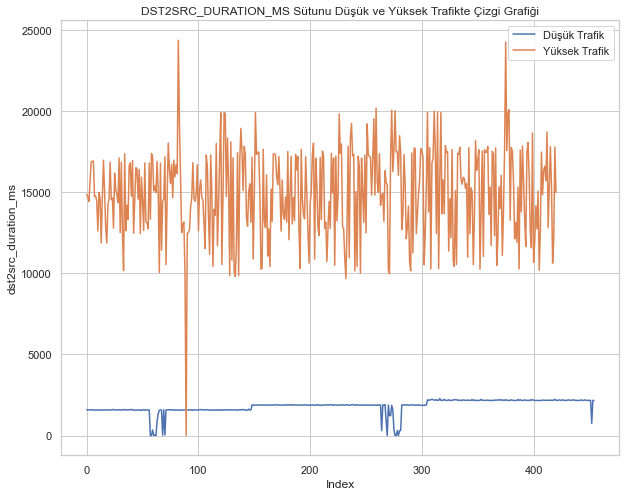

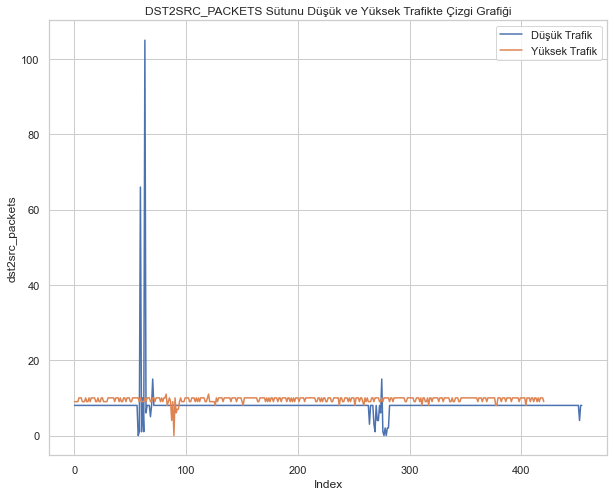

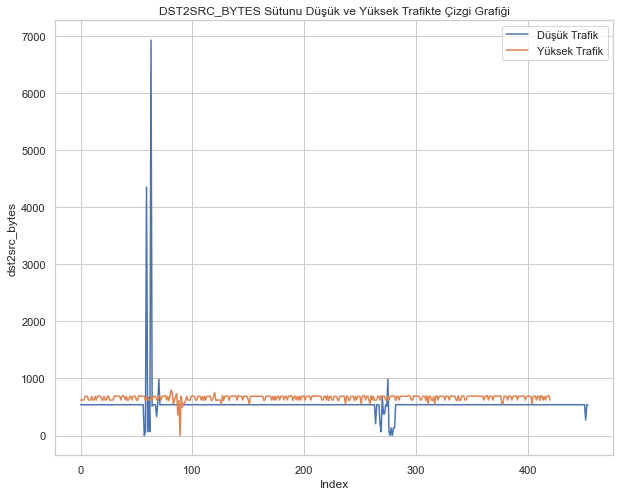

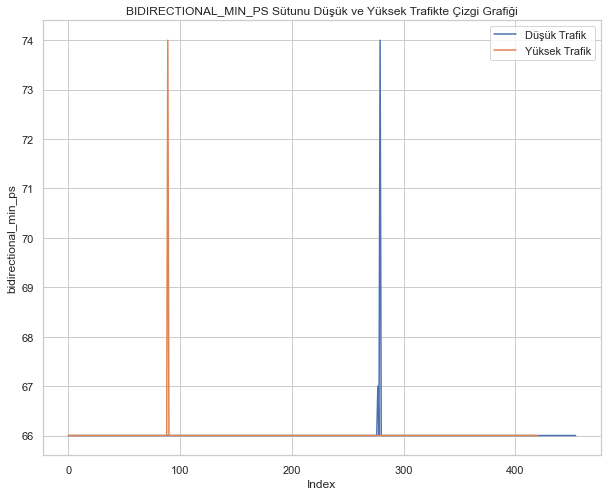

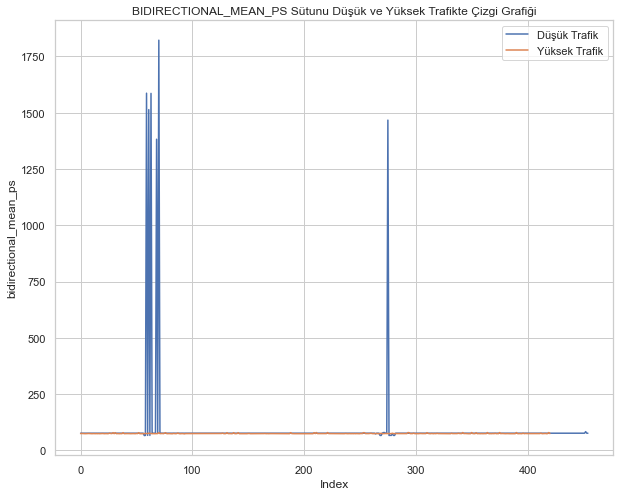

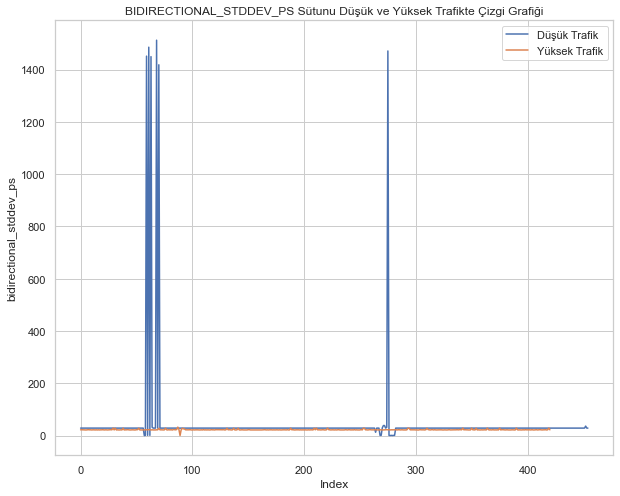

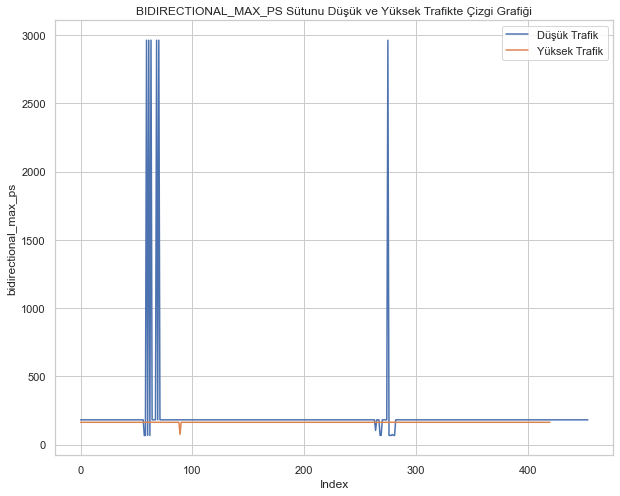

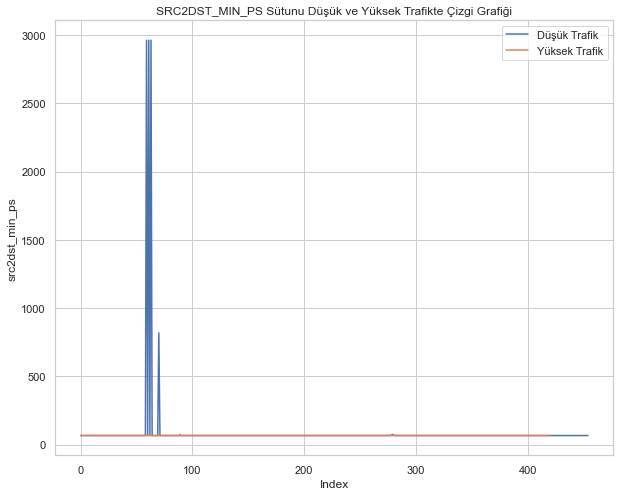

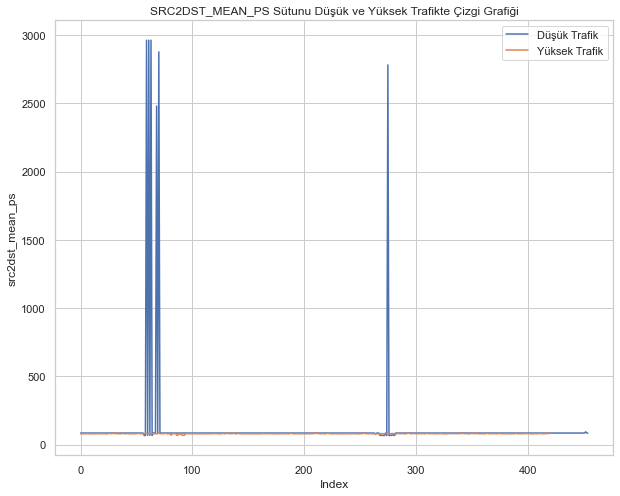

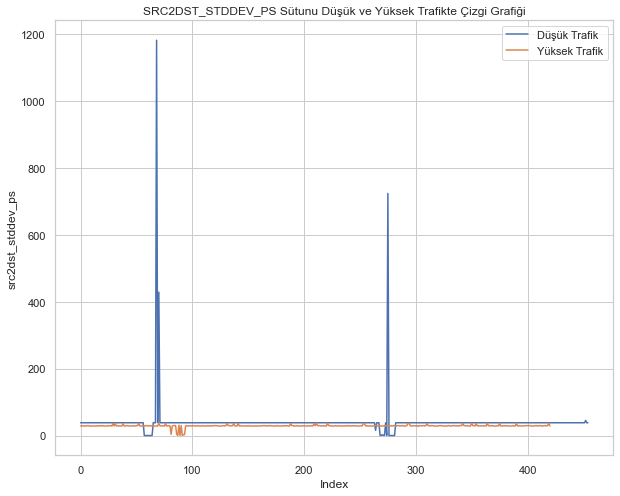

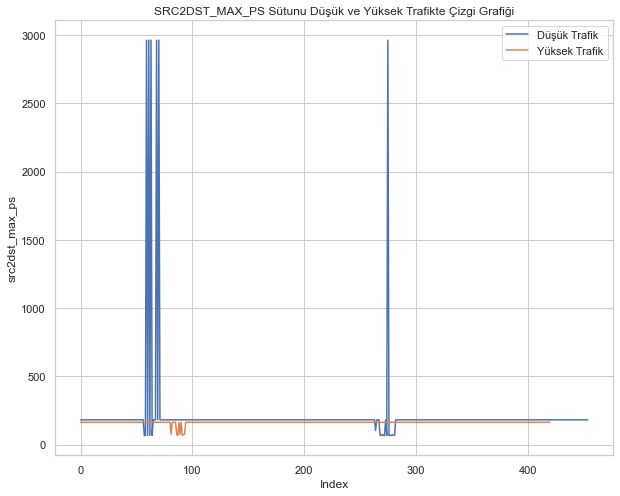

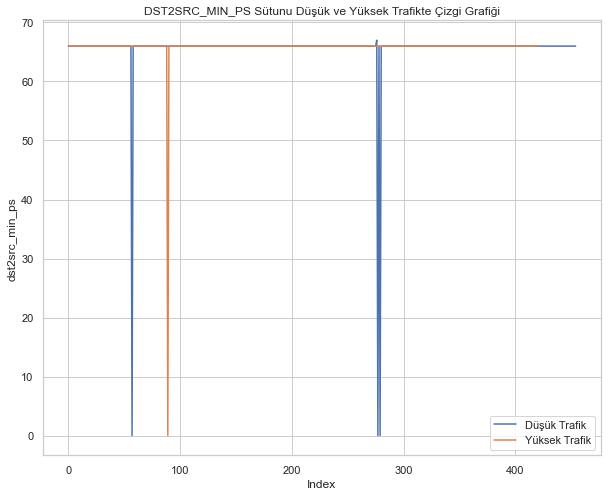

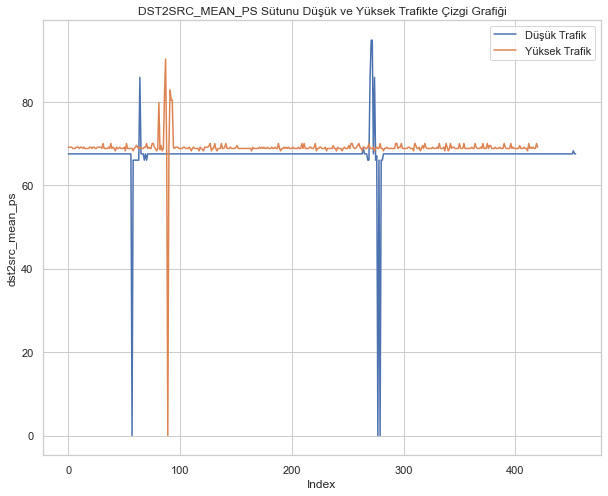

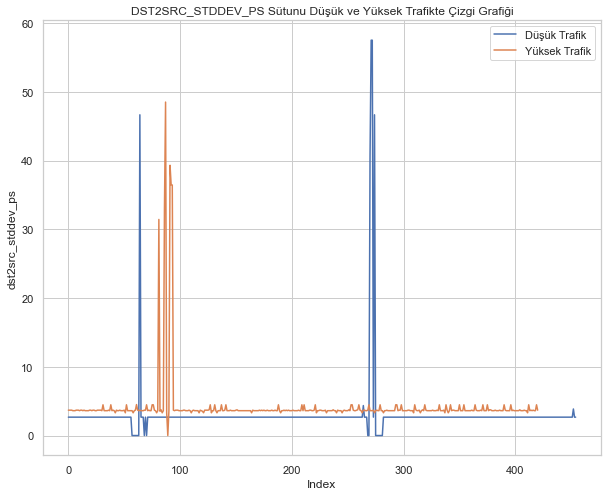

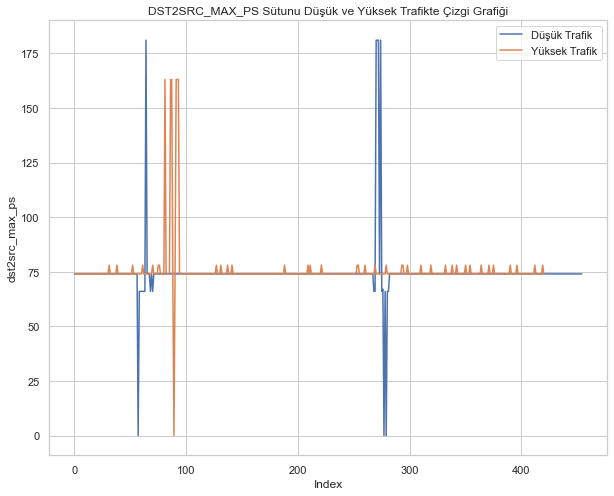

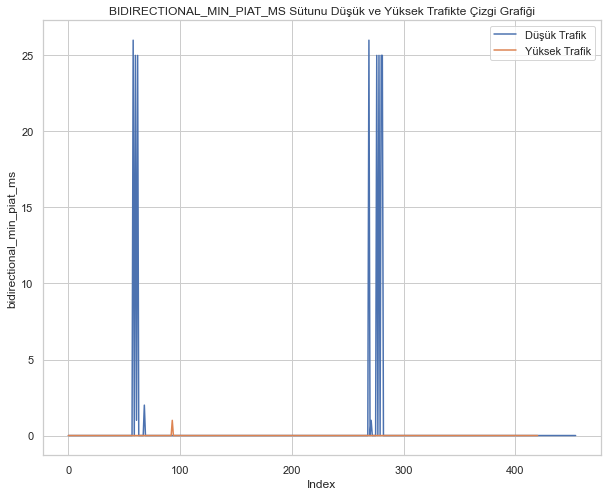

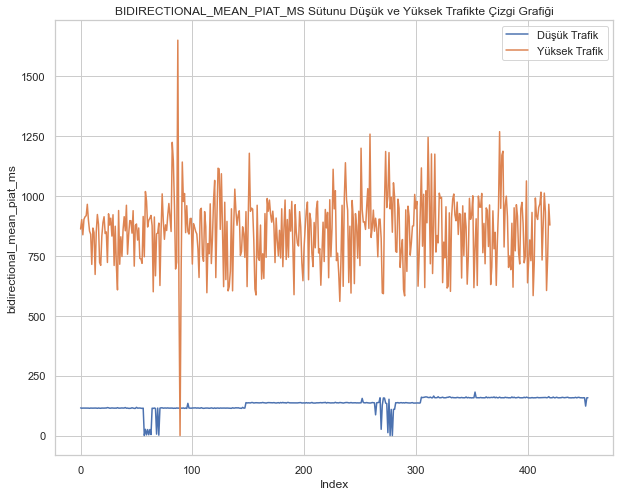

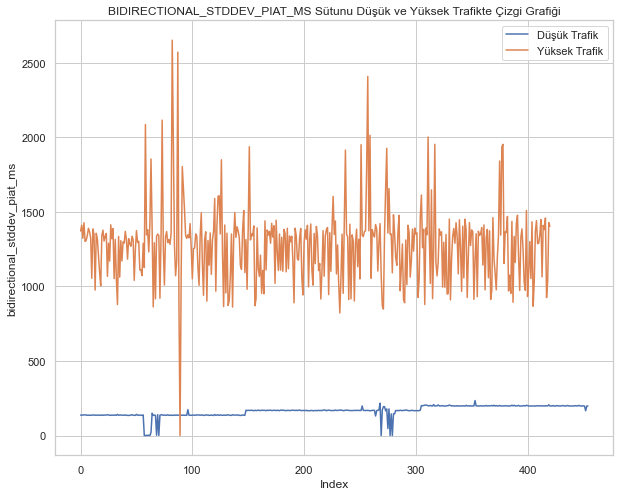

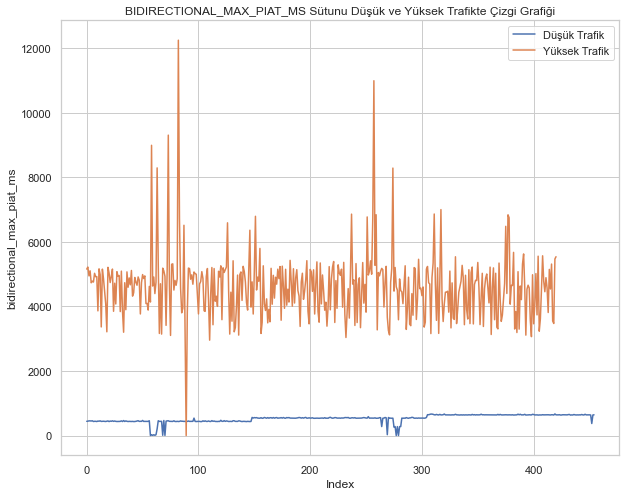

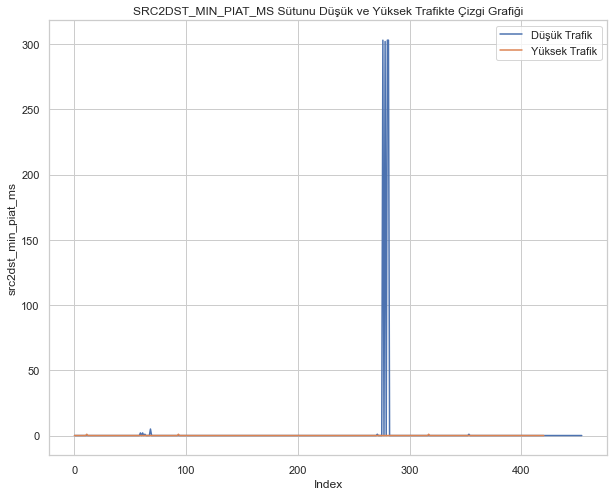

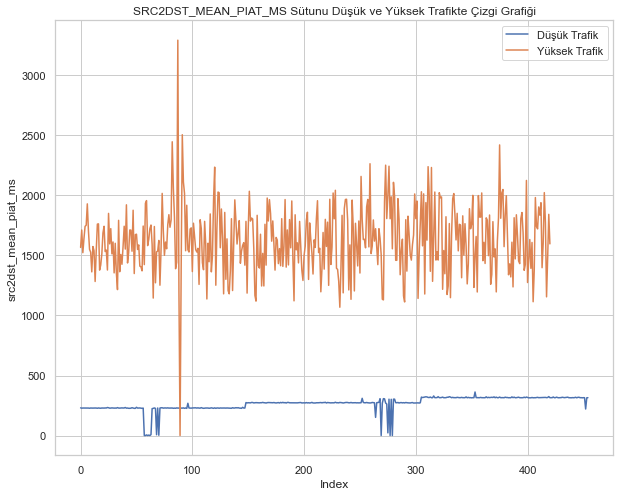

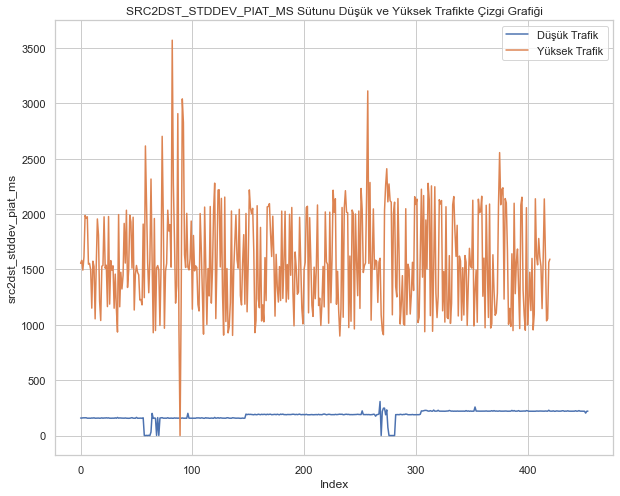

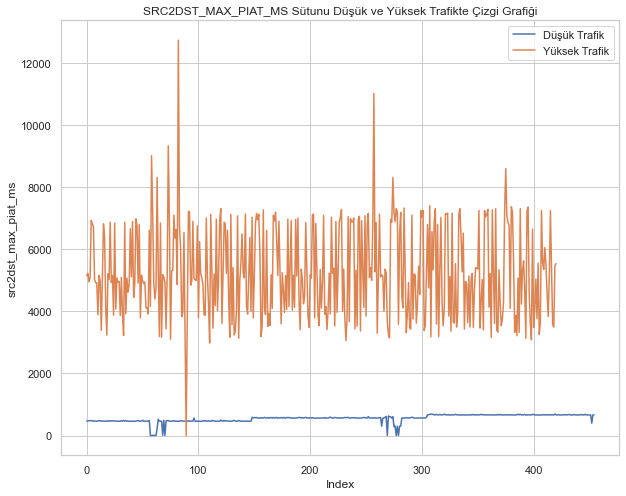

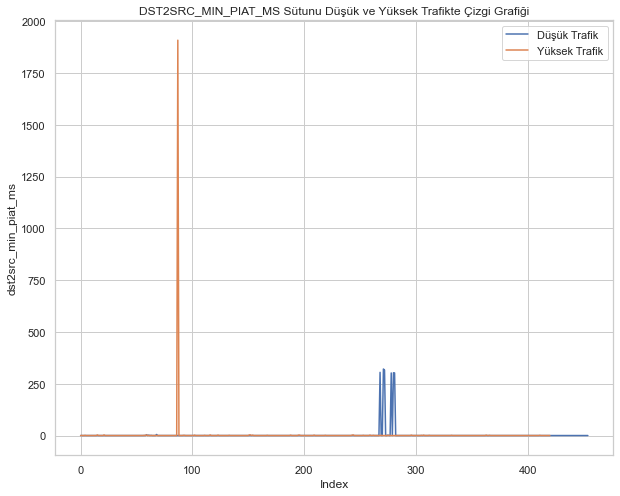

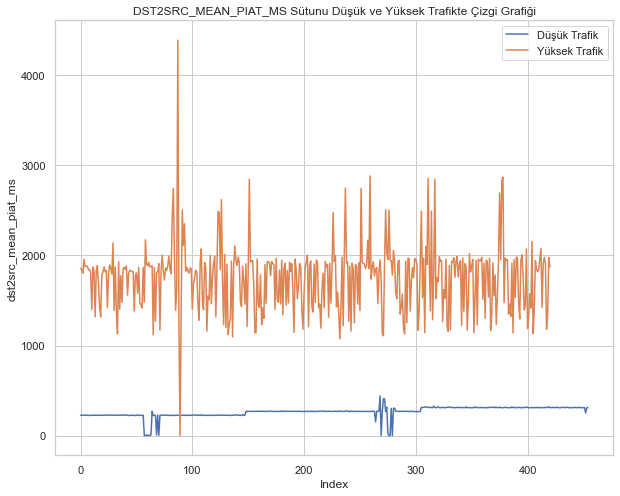

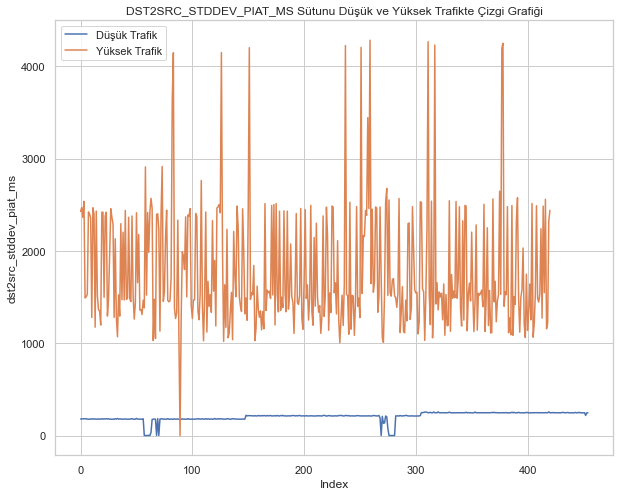

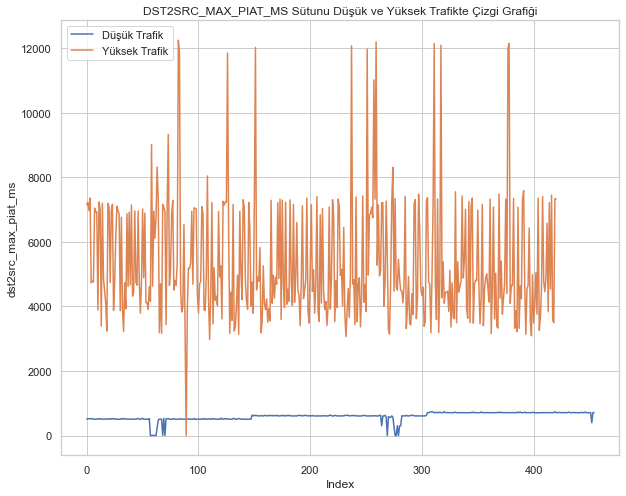

In [33]:
for column in nfstream_columns:
    linePlot(column)

columns_that_do_not_effect_result_label = []
df = df.drop(columns_that_do_not_effect_result_label, axis=1)

<a id="6"></a>
# Bizim Tarafımızdan Farklı Araçlar ile Elde Edilen Verilerin İncelenmesi

In [34]:
columns = ['average_rtt', 'packet_loss', 'bits_per_second', 'bu_ratio',
           'retransmits', 'cpu_host_total', 'cpu_host_user', 'cpu_host_system',
           'cpu_remote_total', 'cpu_remote_user', 'cpu_remote_system','hop_count', 'traffic_type_numeric']

In [35]:
corr2 = df.loc[:,columns].corr()
corr2

,average_rtt,packet_loss,bits_per_second,bu_ratio,retransmits,cpu_host_total,cpu_host_user,cpu_host_system,cpu_remote_total,cpu_remote_user,cpu_remote_system,hop_count,traffic_type_numeric
average_rtt,1.000000,0.974301,-0.988655,0.988655,-0.881765,0.857223,0.367113,0.882907,-0.461838,-0.026726,-0.451802,0.130181,0.991127
packet_loss,0.974301,1.000000,-0.958813,0.958813,-0.856482,0.818086,0.334741,0.844476,-0.448443,-0.032222,-0.438163,0.129026,0.962451
bits_per_second,-0.988655,-0.958813,1.000000,-1.000000,0.895104,-0.864628,-0.367154,-0.890911,0.461401,0.023511,0.451646,-0.079731,-0.995574
bu_ratio,0.988655,0.958813,-1.000000,1.000000,-0.895104,0.864628,0.367154,0.890911,-0.461401,-0.023511,-0.451646,0.079731,0.995574
retransmits,-0.881765,-0.856482,0.895104,-0.895104,1.000000,-0.793478,-0.361453,-0.814650,0.371452,0.064500,0.359714,-0.022835,-0.890644
cpu_host_total,0.857223,0.818086,-0.864628,0.864628,-0.793478,1.000000,0.707440,0.996379,-0.387833,-0.027682,-0.378959,0.094959,0.859517
cpu_host_user,0.367113,0.334741,-0.367154,0.367154,-0.361453,0.707440,1.000000,0.644790,-0.161906,-0.048280,-0.155075,0.170149,0.352953
cpu_host_system,0.882907,0.844476,-0.890911,0.890911,-0.814650,0.996379,0.644790,1.000000,-0.399956,-0.024130,-0.391181,0.082229,0.887091
cpu_remote_total,-0.461838,-0.448443,0.461401,-0.461401,0.371452,-0.387833,-0.161906,-0.399956,1.000000,-0.155380,0.996449,-0.057785,-0.464206
cpu_remote_user,-0.026726,-0.032222,0.023511,-0.023511,0.064500,-0.027682,-0.048280,-0.024130,-0.155380,1.000000,-0.238009,-0.009688,-0.024563


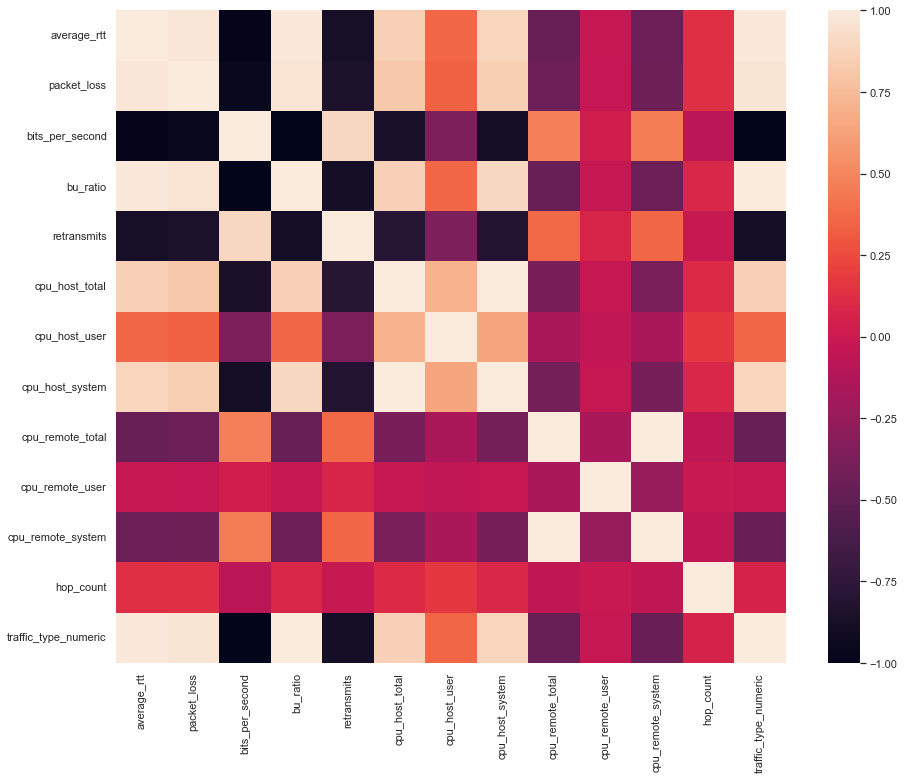

In [36]:
plt.figure(figsize=(15, 12))
ax1 = sns.heatmap(corr2, vmin=-1, vmax=1)

In [37]:
columns.remove("traffic_type_numeric")

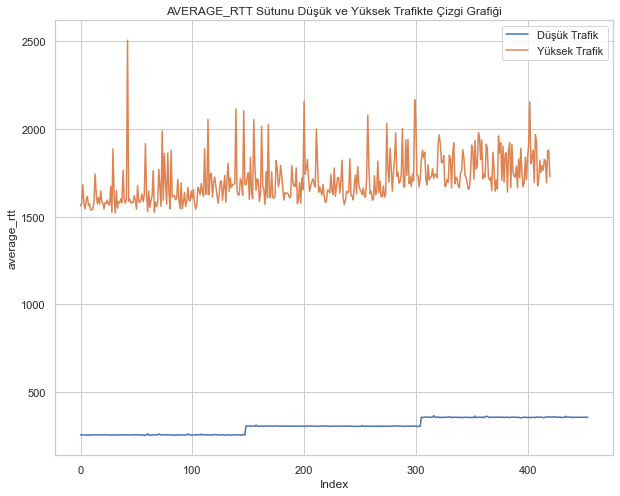

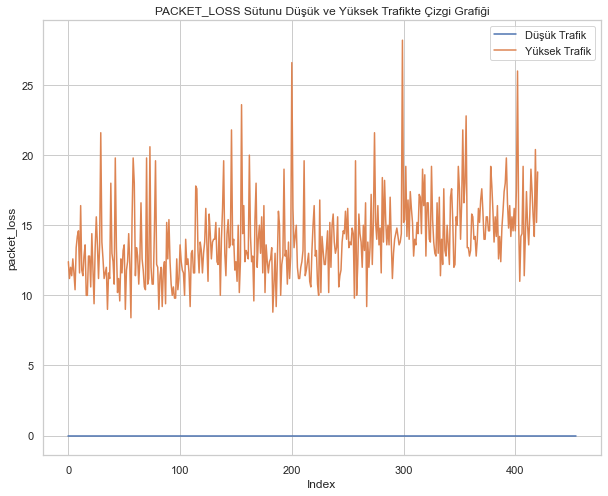

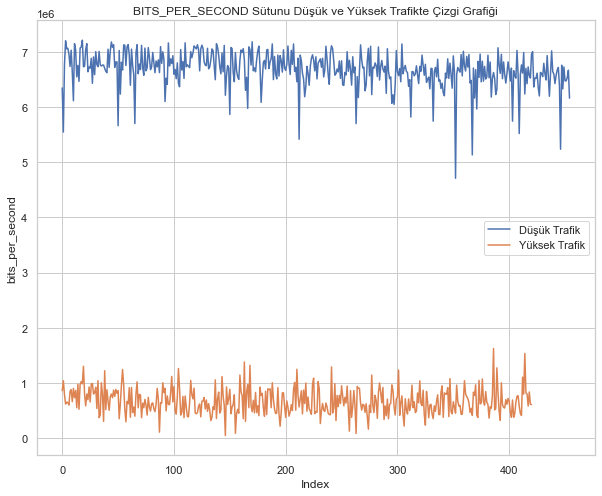

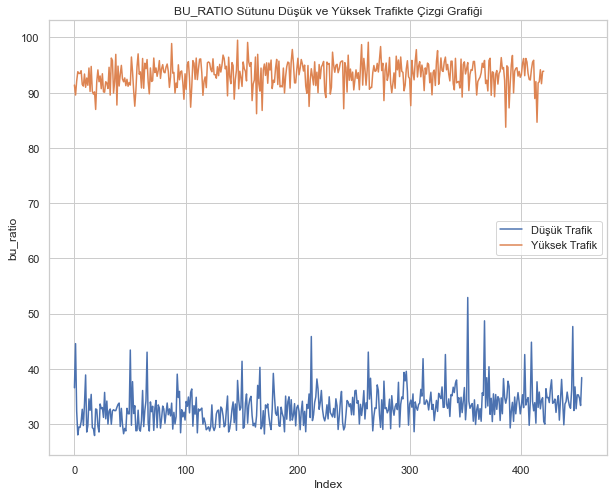

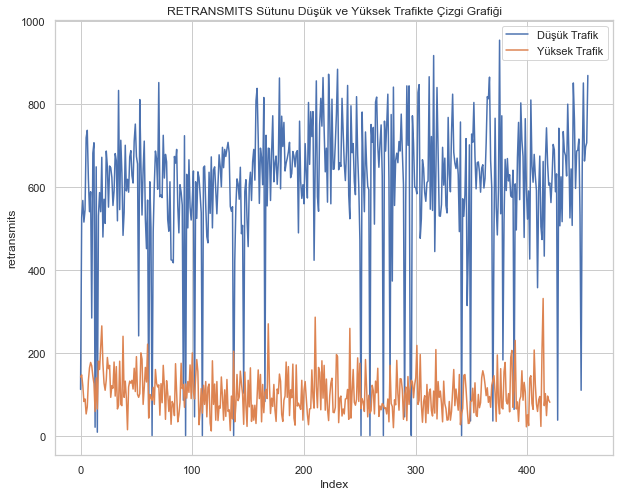

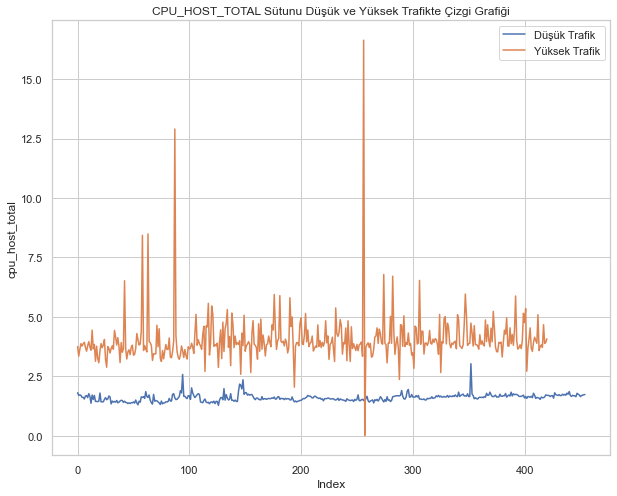

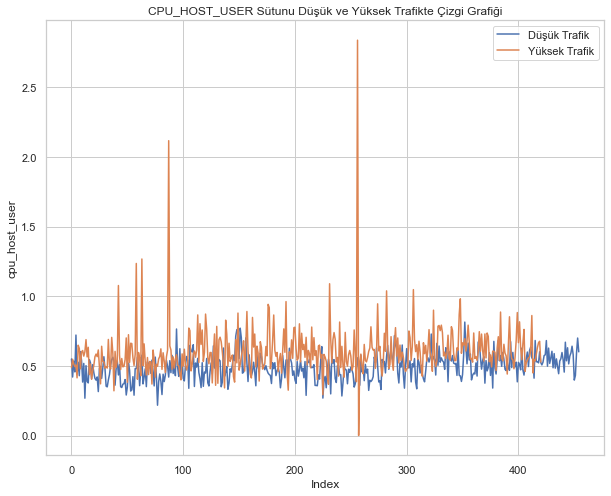

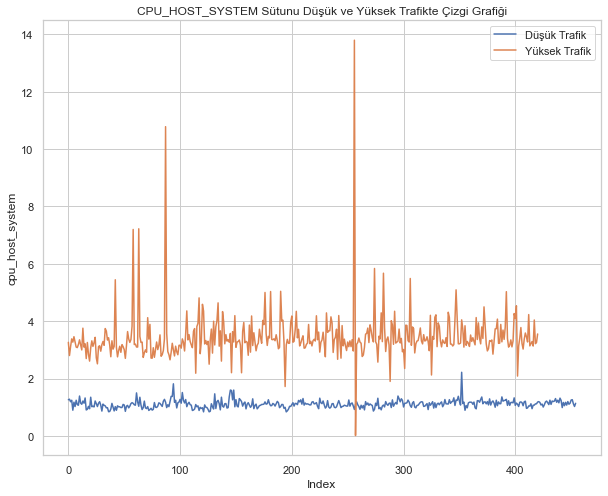

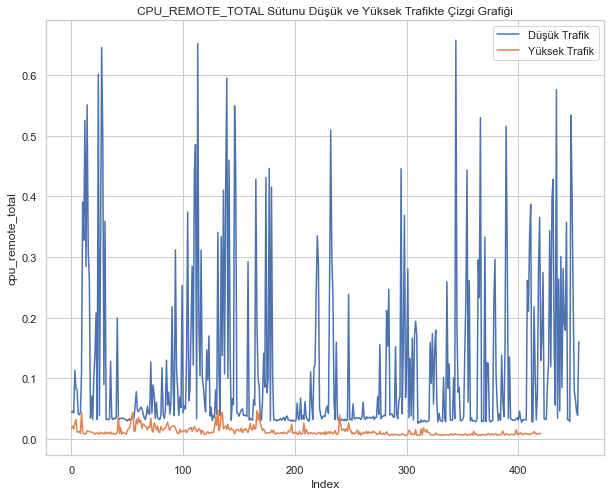

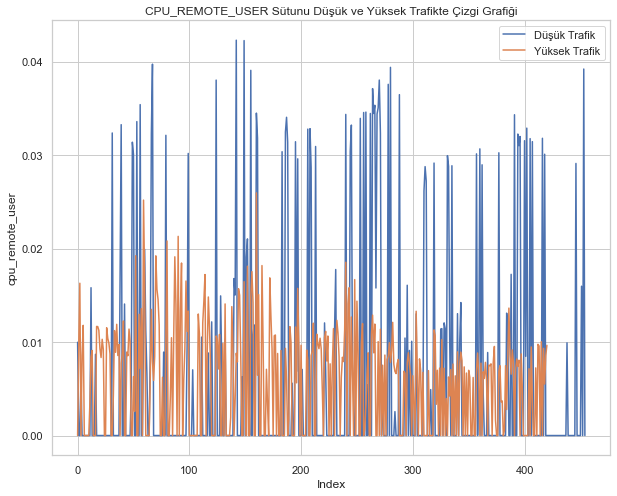

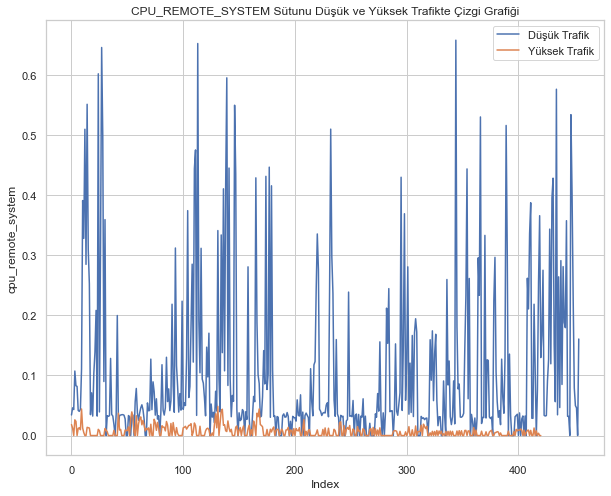

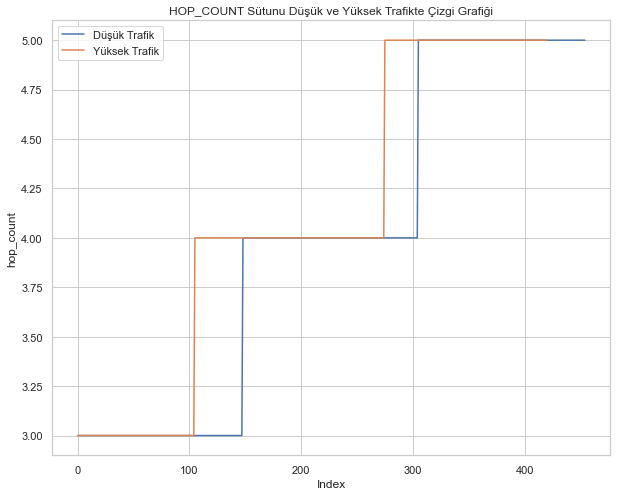

In [38]:
for column in columns:
    linePlot(column)

<a id="7"></a>
# Trafik Düzeyini Etkilemeyen Değişkenlerin Veri Setinden Çıkarılması

In [39]:
columns_that_do_not_effect_result_label = ['bidirectional_packets', 'bidirectional_bytes', 'src2dst_packets',
                                          'src2dst_bytes', 'dst2src_packets', 'dst2src_bytes', 'bidirectional_min_ps',
                                          'bidirectional_mean_ps', 'bidirectional_stddev_ps', 'bidirectional_max_ps',
                                          'src2dst_min_ps', 'src2dst_mean_ps', 'src2dst_stddev_ps', 'src2dst_max_ps',
                                          'dst2src_min_ps', 'dst2src_mean_ps', 'dst2src_stddev_ps', 'dst2src_max_ps',
                                          'bidirectional_min_piat_ms', 'src2dst_min_piat_ms', 'dst2src_min_piat_ms',
                                          'cpu_host_user', 'cpu_remote_total', 'cpu_remote_user', 'cpu_remote_system',
                                          'hop_count']
df = df.drop(columns_that_do_not_effect_result_label, axis=1)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 876 entries, 0 to 875
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   average_rtt                   876 non-null    float64
 1   packet_loss                   876 non-null    float64
 2   bits_per_second               876 non-null    float64
 3   bu_ratio                      876 non-null    float64
 4   retransmits                   876 non-null    int64  
 5   cpu_host_total                876 non-null    float64
 6   cpu_host_system               876 non-null    float64
 7   bidirectional_duration_ms     876 non-null    int64  
 8   src2dst_duration_ms           876 non-null    int64  
 9   dst2src_duration_ms           876 non-null    int64  
 10  bidirectional_mean_piat_ms    876 non-null    float64
 11  bidirectional_stddev_piat_ms  876 non-null    float64
 12  bidirectional_max_piat_ms     876 non-null    int64  
 13  src2d

<a id="8"></a>
# Sonuç Değişkeni ile İlişkili Sütunların Korelasyon Matriksinin Oluşturulması

In [41]:
corr3 = df.loc[:,:].corr()
corr3

,average_rtt,packet_loss,bits_per_second,bu_ratio,retransmits,cpu_host_total,cpu_host_system,bidirectional_duration_ms,src2dst_duration_ms,dst2src_duration_ms,bidirectional_mean_piat_ms,bidirectional_stddev_piat_ms,bidirectional_max_piat_ms,src2dst_mean_piat_ms,src2dst_stddev_piat_ms,src2dst_max_piat_ms,dst2src_mean_piat_ms,dst2src_stddev_piat_ms,dst2src_max_piat_ms,traffic_type_numeric
average_rtt,1.000000,0.974301,-0.988655,0.988655,-0.881765,0.857223,0.882907,0.962944,0.962928,0.956516,0.956686,0.948194,0.940257,0.956299,0.911304,0.915596,0.937117,0.860471,0.870463,0.991127
packet_loss,0.974301,1.000000,-0.958813,0.958813,-0.856482,0.818086,0.844476,0.938499,0.938491,0.931888,0.928589,0.922985,0.917517,0.926695,0.884409,0.889165,0.909889,0.845371,0.855011,0.962451
bits_per_second,-0.988655,-0.958813,1.000000,-1.000000,0.895104,-0.864628,-0.890911,-0.963452,-0.963433,-0.956762,-0.958098,-0.948887,-0.941665,-0.956627,-0.910530,-0.914422,-0.940120,-0.864959,-0.875952,-0.995574
bu_ratio,0.988655,0.958813,-1.000000,1.000000,-0.895104,0.864628,0.890911,0.963452,0.963433,0.956762,0.958098,0.948887,0.941665,0.956627,0.910530,0.914422,0.940120,0.864959,0.875952,0.995574
retransmits,-0.881765,-0.856482,0.895104,-0.895104,1.000000,-0.793478,-0.814650,-0.859617,-0.859589,-0.854238,-0.854429,-0.845319,-0.838710,-0.853034,-0.813100,-0.816561,-0.838933,-0.769250,-0.779794,-0.890644
cpu_host_total,0.857223,0.818086,-0.864628,0.864628,-0.793478,1.000000,0.996379,0.807850,0.807819,0.801963,0.820836,0.823764,0.813132,0.824310,0.774994,0.768155,0.807744,0.723156,0.729860,0.859517
cpu_host_system,0.882907,0.844476,-0.890911,0.890911,-0.814650,0.996379,1.000000,0.836772,0.836741,0.830692,0.847451,0.849216,0.838978,0.850126,0.800950,0.795348,0.833750,0.750364,0.757592,0.887091
bidirectional_duration_ms,0.962944,0.938499,-0.963452,0.963452,-0.859617,0.807850,0.836772,1.000000,1.000000,0.999127,0.991449,0.979806,0.968958,0.987666,0.965982,0.969796,0.980336,0.910518,0.920981,0.966646
src2dst_duration_ms,0.962928,0.938491,-0.963433,0.963433,-0.859589,0.807819,0.836741,1.000000,1.000000,0.999120,0.991424,0.979776,0.968939,0.987636,0.965949,0.969776,0.980300,0.910505,0.920968,0.966628
dst2src_duration_ms,0.956516,0.931888,-0.956762,0.956762,-0.854238,0.801963,0.830692,0.999127,0.999120,1.000000,0.992759,0.981968,0.970001,0.989370,0.972428,0.974776,0.983779,0.913295,0.923486,0.959721


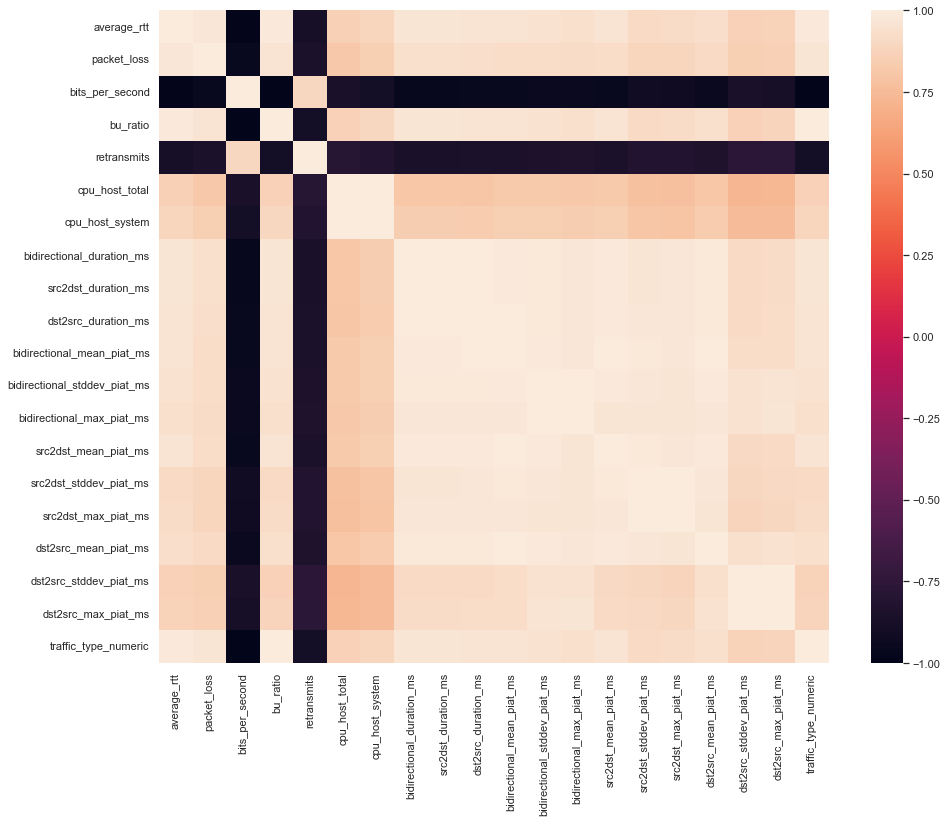

In [42]:
plt.figure(figsize=(15, 12))
ax1 = sns.heatmap(corr3, vmin=-1, vmax=1)

<a id="9"></a>
# Özellik Çıkarımı Yapılmış Yeni Veri Setinin Kayıt Edilmesi

In [47]:
df.to_csv("result_data.csv", sep=',', index=False, encoding='utf-8')